# Quality control of single libraries, merge and normalization

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns

In [2]:
cd /Users/gattigli/Desktop/scRNAseq/scanpy/dataset_deep

/Users/gattigli/Desktop/scRNAseq/scanpy/dataset_deep


In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi = 80, dpi_save=300, facecolor='white', vector_friendly=True, transparent=True)

scanpy==1.7.0rc1 anndata==0.7.5 umap==0.4.6 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [5]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [6]:
import os
print(os.environ['CONDA_DEFAULT_ENV'])

scanpy


## open the datasets

In [32]:
results_file_0 = '220310_0_dataset.h5ad'  # the file that will store the analysis results
results_file_075 = '220310_075_dataset.h5ad'
results_file_3 = '220310_3_dataset.h5ad'
results_file_12 = '220310_12_dataset.h5ad'
results_file_AZD = '220310_AZD_dataset.h5ad'

In [7]:
adata_AZD = sc.read_10x_mtx(
    './azd_filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache/azd_filtered_feature_bc_matrix-matrix.h5ad


In [8]:
adata_0 = sc.read_10x_mtx(
    './0_filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache/0_filtered_feature_bc_matrix-matrix.h5ad


In [9]:
adata_075 = sc.read_10x_mtx(
    './075_filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache/075_filtered_feature_bc_matrix-matrix.h5ad


In [10]:
adata_3 = sc.read_10x_mtx(
    './3_filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache/3_filtered_feature_bc_matrix-matrix.h5ad


In [11]:
adata_12 = sc.read_10x_mtx(
    './12_filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading                        # write a cache file for faster subsequent reading

... reading from cache file cache/12_filtered_feature_bc_matrix-matrix.h5ad


In [12]:
adata_AZD.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`
adata_0.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`
adata_3.var_names_make_unique()
adata_12.var_names_make_unique()
adata_075.var_names_make_unique()

In [13]:
adata_AZD

AnnData object with n_obs × n_vars = 2635 × 32285
    var: 'gene_ids', 'feature_types'

In [14]:
adata_0

AnnData object with n_obs × n_vars = 2407 × 32285
    var: 'gene_ids', 'feature_types'

In [15]:
adata_075

AnnData object with n_obs × n_vars = 3829 × 32285
    var: 'gene_ids', 'feature_types'

In [16]:
adata_3

AnnData object with n_obs × n_vars = 3067 × 32285
    var: 'gene_ids', 'feature_types'

In [17]:
adata_12

AnnData object with n_obs × n_vars = 3437 × 32285
    var: 'gene_ids', 'feature_types'

## First preprocessing

- Visualize the genes that yield the highest expressed genes in each dataset 
- Remove cells with less than 200 genes per cells
- Annotate the group of mitochondrial genes

normalizing counts per cell
    finished (0:00:00)


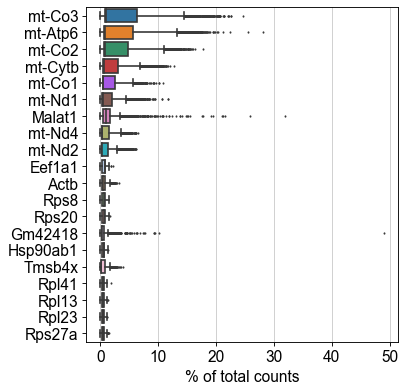

normalizing counts per cell
    finished (0:00:00)


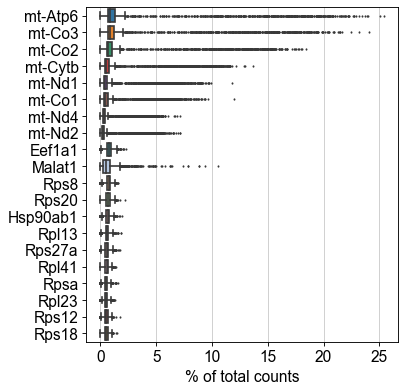

normalizing counts per cell
    finished (0:00:00)


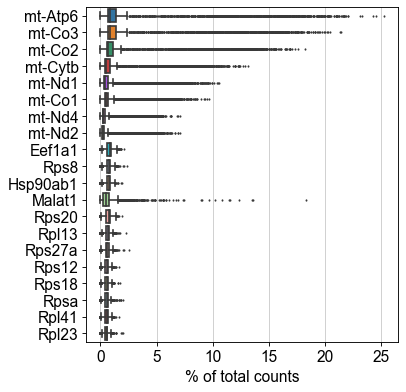

normalizing counts per cell
    finished (0:00:00)


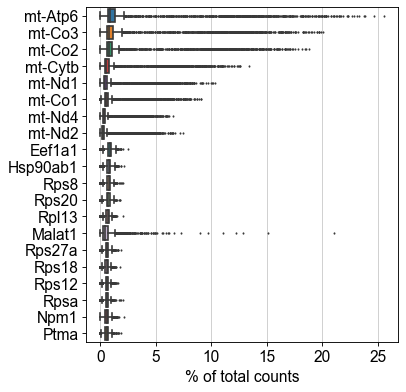

normalizing counts per cell
    finished (0:00:00)


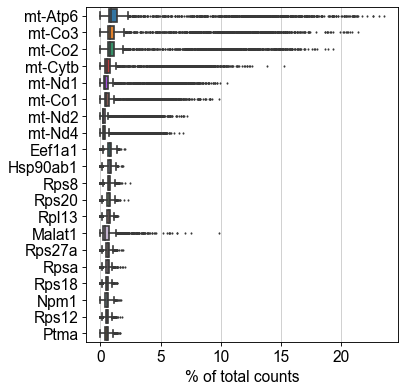

In [18]:
sc.pl.highest_expr_genes(adata_AZD, n_top=20, )   #here the first 20 genes
sc.pl.highest_expr_genes(adata_0, n_top=20, )   #here the first 20 genes
sc.pl.highest_expr_genes(adata_075, n_top=20, )   #here the first 20 genes
sc.pl.highest_expr_genes(adata_3, n_top=20, )   #here the first 20 genes
sc.pl.highest_expr_genes(adata_12, n_top=20, )   #here the first 20 genes

In [19]:
sc.pp.filter_cells(adata_AZD, min_genes=200) # Filters out cells with less than x genes expressed. Not too important, 
#with the more advanced filtering later on

sc.pp.filter_cells(adata_0, min_genes=200) 

sc.pp.filter_cells(adata_075, min_genes=200) 

sc.pp.filter_cells(adata_3, min_genes=200) 

sc.pp.filter_cells(adata_12, min_genes=200) 

filtered out 71 cells that have less than 200 genes expressed
filtered out 123 cells that have less than 200 genes expressed
filtered out 133 cells that have less than 200 genes expressed
filtered out 79 cells that have less than 200 genes expressed
filtered out 75 cells that have less than 200 genes expressed


In [20]:
adata_AZD.var['mt'] = adata_AZD.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_AZD, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata_0.var['mt'] = adata_0.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_0, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata_075.var['mt'] = adata_075.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_075, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata_3.var['mt'] = adata_3.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_3, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata_12.var['mt'] = adata_12.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_12, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

## Visualize the raw data:

- N_genes_by_counts = number of genes expressed in the count matrix, so the number of genes per cell. I filtered for cells with a minimum of 200 genes in the first preprocessing
- Total_counts = ‘total counts per cell’: UMI, so how many unique molecular identifiers, or 'reads' have been identified per cell
- Pct_counts_mt = % mitochondrial genes over the total


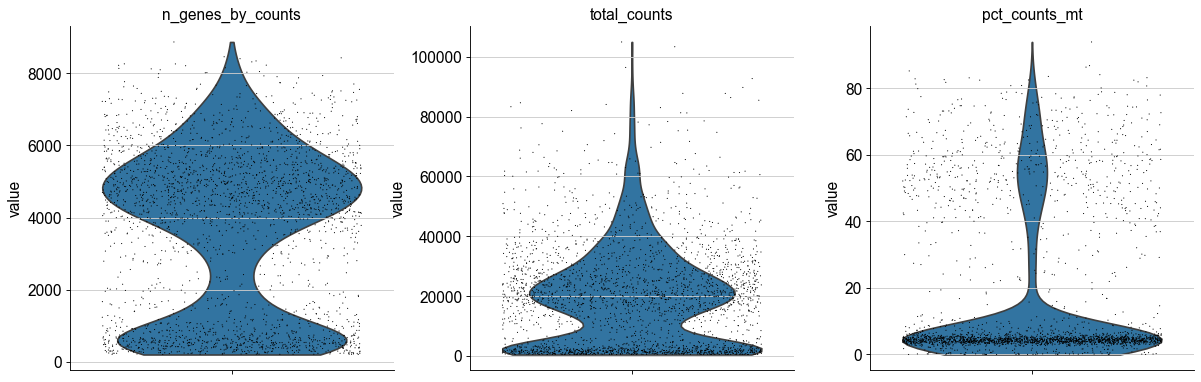

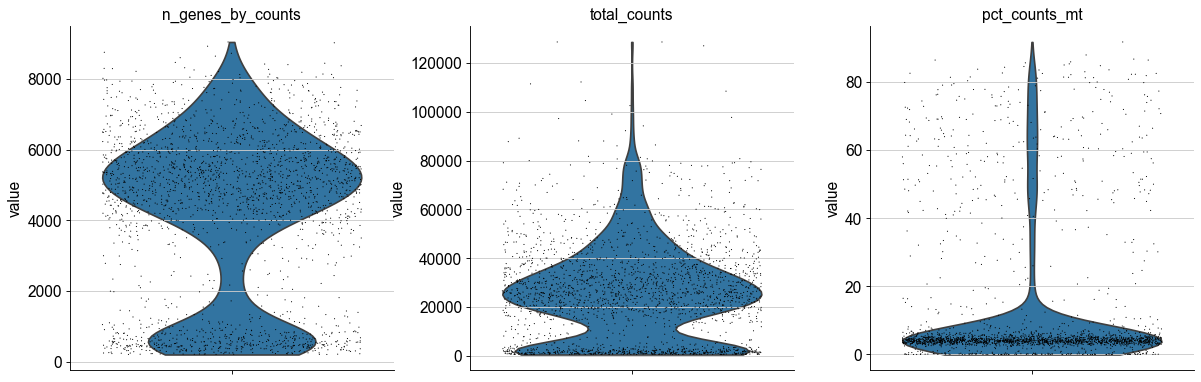

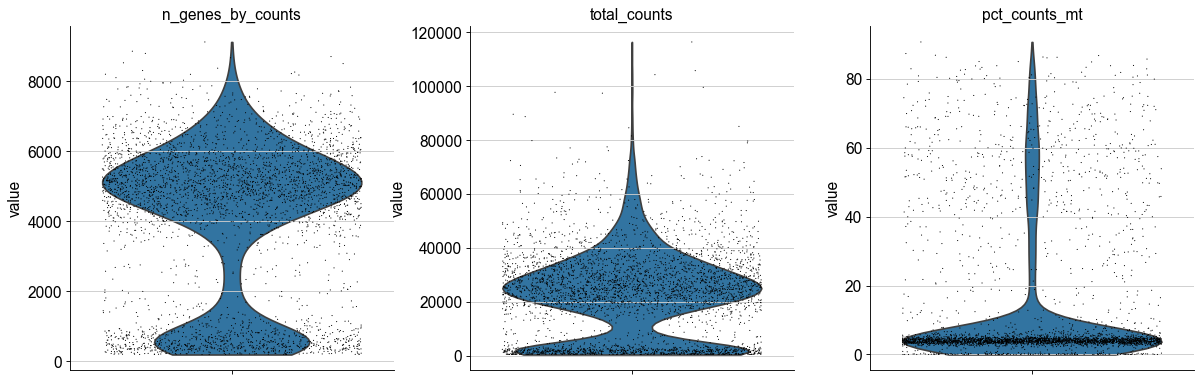

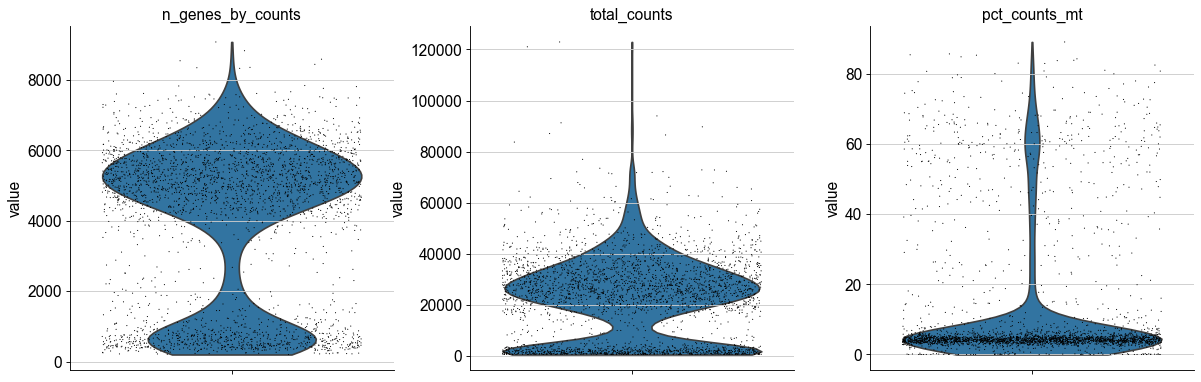

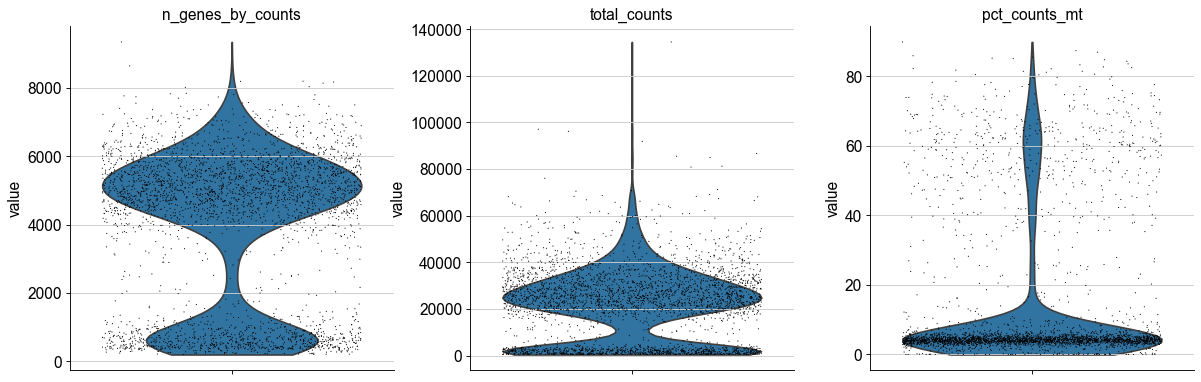

In [22]:
sc.pl.violin(adata_AZD, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.violin(adata_0, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.violin(adata_075, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.violin(adata_3, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True, save='preprocessing.pdf')

sc.pl.violin(adata_12, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

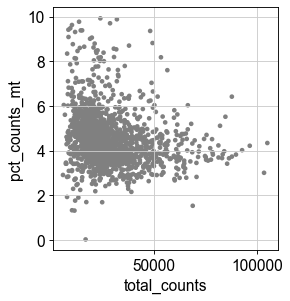

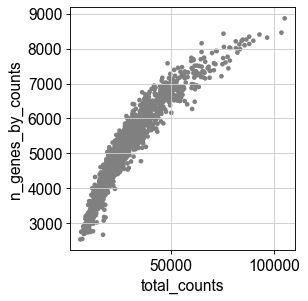

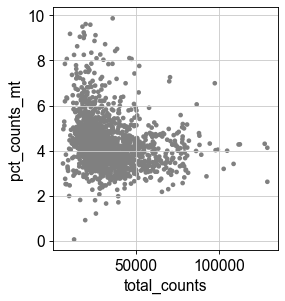

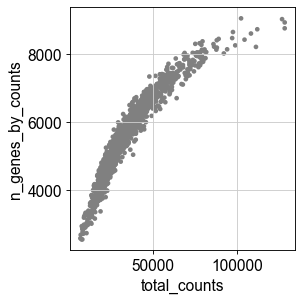

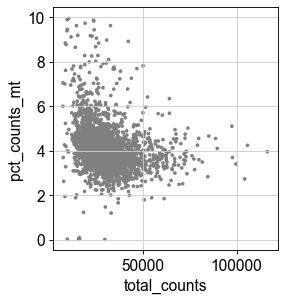

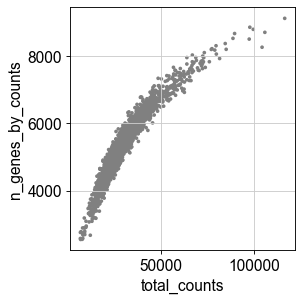

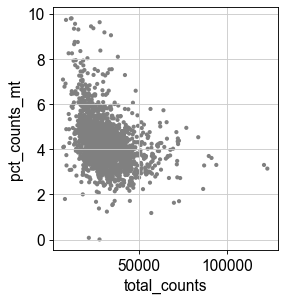

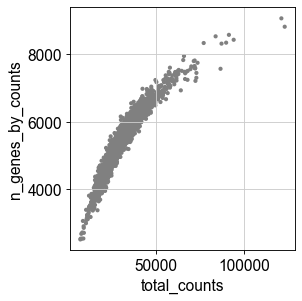

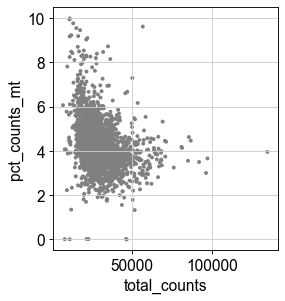

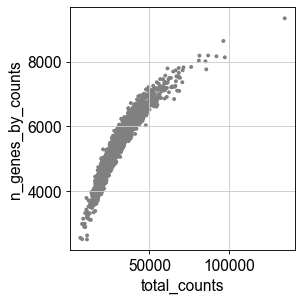

In [27]:
sc.pl.scatter(adata_AZD, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_AZD, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(adata_0, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_0, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(adata_075, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_075, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(adata_3, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_3, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(adata_12, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_12, x='total_counts', y='n_genes_by_counts')

## Preprocess and save the files

- Remove cells that have too many mitochondrial genes expressed, I chose a treshold of 10%
- Remove cells with not enough genes per cells. I chose a threshold of 2500 based on the graph  

In [25]:
adata_AZD = adata_AZD[adata_AZD.obs.pct_counts_mt < 10, :]
adata_AZD = adata_AZD[adata_AZD.obs.n_genes_by_counts > 2500, :]

adata_0 = adata_0[adata_0.obs.pct_counts_mt < 10, :]
adata_0 = adata_0[adata_0.obs.n_genes_by_counts > 2500, :]

adata_075 = adata_075[adata_075.obs.pct_counts_mt < 10, :]
adata_075 = adata_075[adata_075.obs.n_genes_by_counts > 2500, :]

adata_3 = adata_3[adata_3.obs.pct_counts_mt < 10, :]
adata_3 = adata_3[adata_3.obs.n_genes_by_counts > 2500, :]

adata_12 = adata_12[adata_12.obs.pct_counts_mt < 10, :]
adata_12 = adata_12[adata_12.obs.n_genes_by_counts > 2500, :]

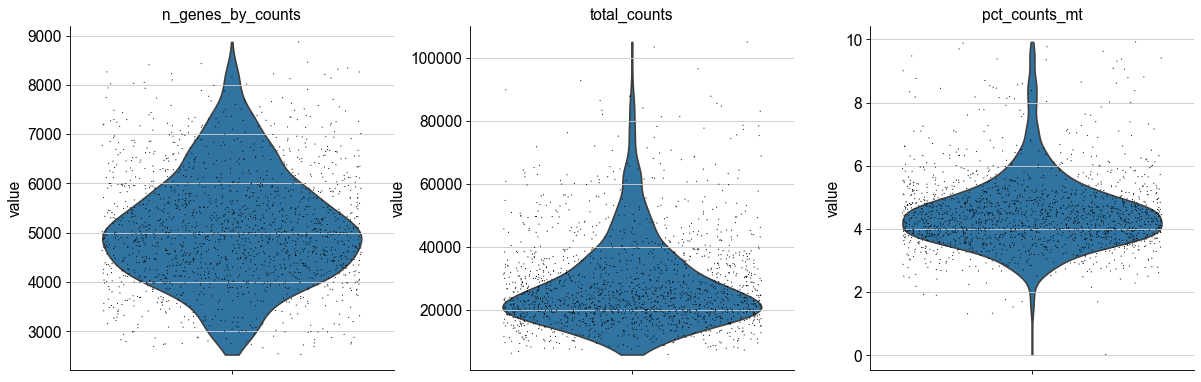

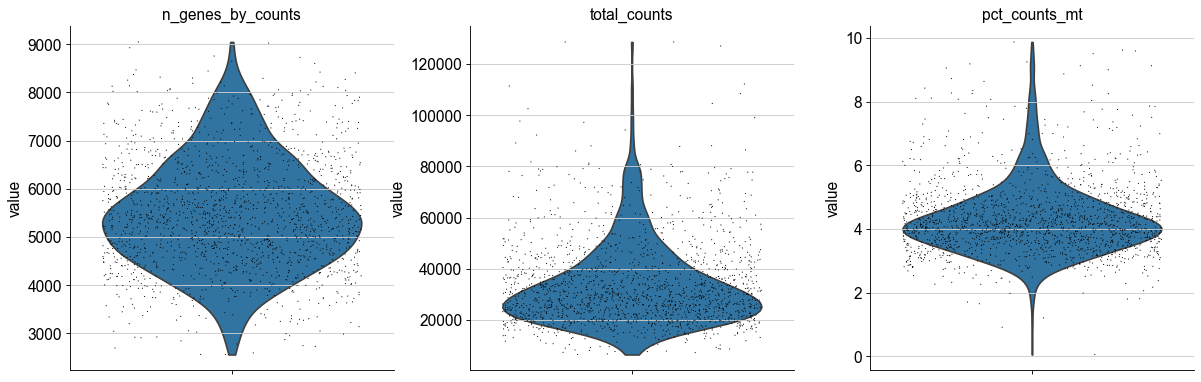

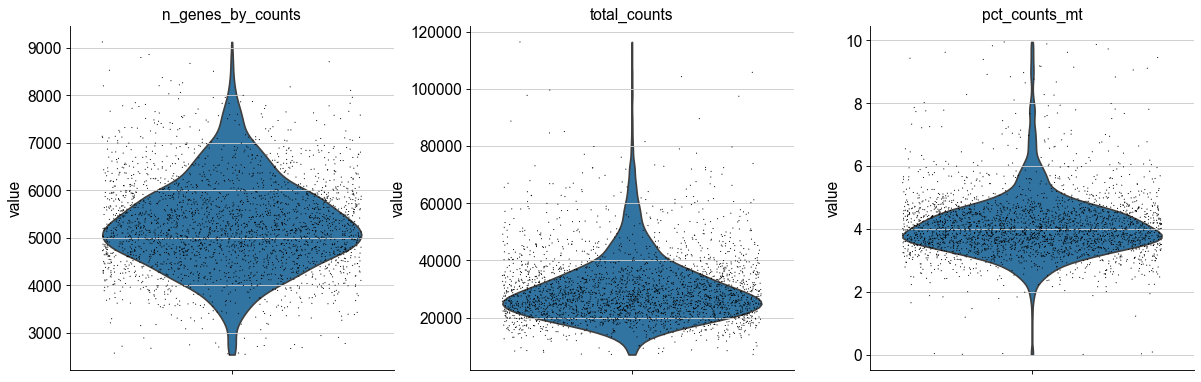

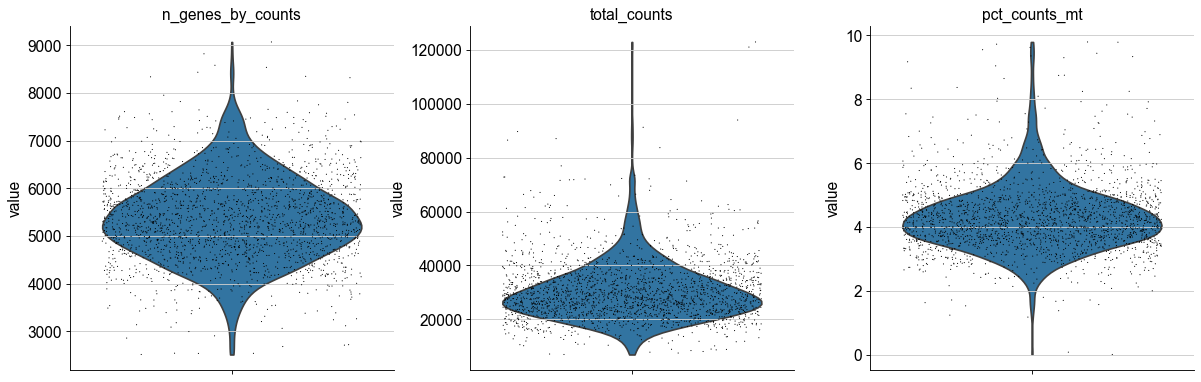

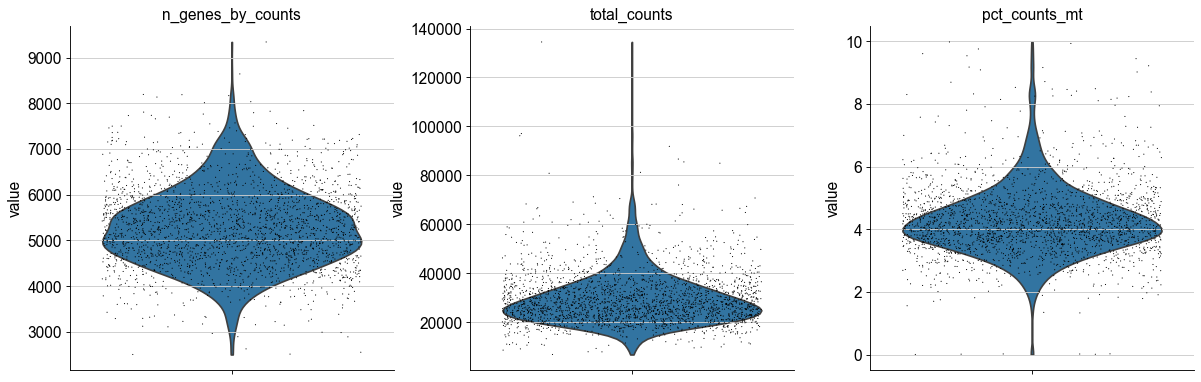

In [26]:
sc.pl.violin(adata_AZD, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.violin(adata_0, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.violin(adata_075, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.violin(adata_3, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True, save='postprocessing.pdf')

sc.pl.violin(adata_12, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

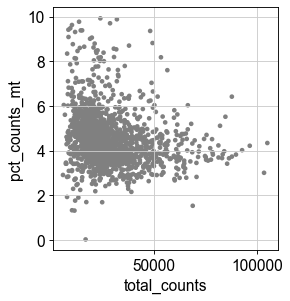

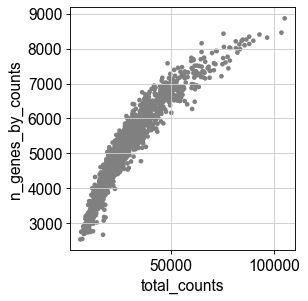

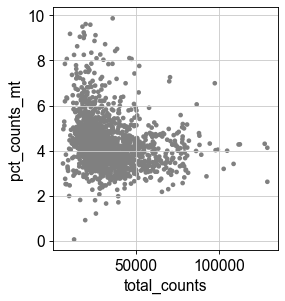

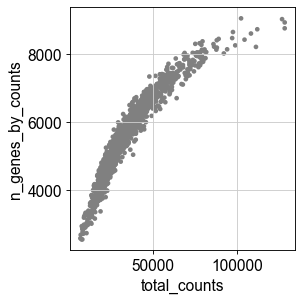

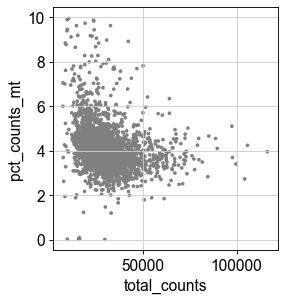

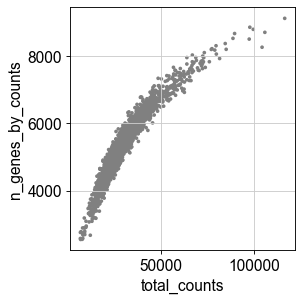

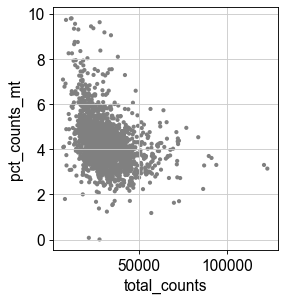

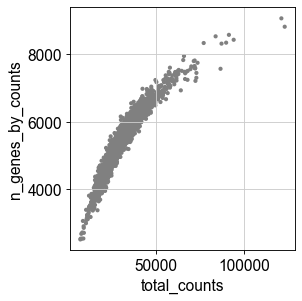

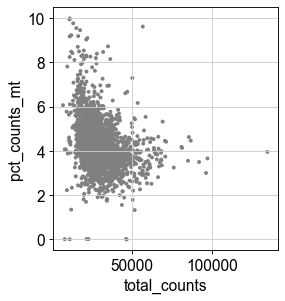

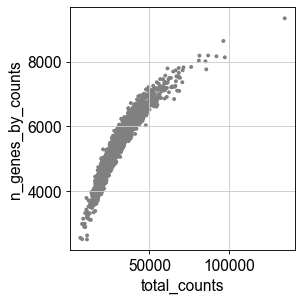

In [26]:
sc.pl.scatter(adata_AZD, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_AZD, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(adata_0, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_0, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(adata_075, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_075, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(adata_3, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_3, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(adata_12, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_12, x='total_counts', y='n_genes_by_counts')

In [27]:
adata_AZD

View of AnnData object with n_obs × n_vars = 1701 × 32285
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [28]:
adata_0

View of AnnData object with n_obs × n_vars = 1696 × 32285
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [29]:
adata_075

View of AnnData object with n_obs × n_vars = 2725 × 32285
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [30]:
adata_3

View of AnnData object with n_obs × n_vars = 2125 × 32285
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [31]:
adata_12

View of AnnData object with n_obs × n_vars = 2406 × 32285
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [33]:
adata_AZD.write(results_file_AZD)
adata_0.write(results_file_0)
adata_075.write(results_file_075)
adata_3.write(results_file_3)
adata_12.write(results_file_12)

# Concatenate and normalize the datasets

In [2]:
import scanpy as sc
import pandas as pd
import seaborn as sns

In [3]:
cd /Users/gattigli/Desktop/scRNAseq/scanpy/dataset_deep

/Users/gattigli/Desktop/scRNAseq/scanpy/dataset_deep


In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi = 80, dpi_save=300, facecolor='white', vector_friendly=True, transparent=True)

scanpy==1.7.0rc1 anndata==0.7.5 umap==0.4.6 numpy==1.18.1 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [5]:
adata_0 = sc.read('./220310_0_dataset.h5ad')
adata_075 = sc.read('./220310_075_dataset.h5ad')
adata_3 = sc.read('./220310_3_dataset.h5ad')
adata_12 = sc.read('./220310_12_dataset.h5ad')
adata_AZD = sc.read('./220310_AZD_dataset.h5ad')

In [6]:
adata_concat = adata_AZD.concatenate(adata_0, adata_075, adata_3, adata_12, batch_categories=['FGFRi', '0', '075', '3', '12'])

In [7]:
adata_concat

AnnData object with n_obs × n_vars = 10653 × 32285
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-075', 'mean_counts-075', 'pct_dropout_by_counts-075', 'total_counts-075', 'n_cells_by_counts-12', 'mean_counts-12', 'pct_dropout_by_counts-12', 'total_counts-12', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells_by_counts-FGFRi', 'mean_counts-FGFRi', 'pct_dropout_by_counts-FGFRi', 'total_counts-FGFRi'

## Normalization:
-  Total-count normalize (library-size correct) the data matrix 𝐗 to 10,000 reads per cell, so that counts become comparable among cells
-  Logarithmize the data
-  Identify and filter for highly-variable genes
-  Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed.
-  Scale each gene to unit variance. Clip values exceeding standard deviation 10.   

In [8]:
sc.pp.normalize_total(adata_concat, target_sum=5e4)

normalizing counts per cell
    finished (0:00:00)


Logarithmize the data:

In [9]:
sc.pp.log1p(adata_concat)

Identify highly-variable genes:

In [10]:
sc.pp.highly_variable_genes(adata_concat, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


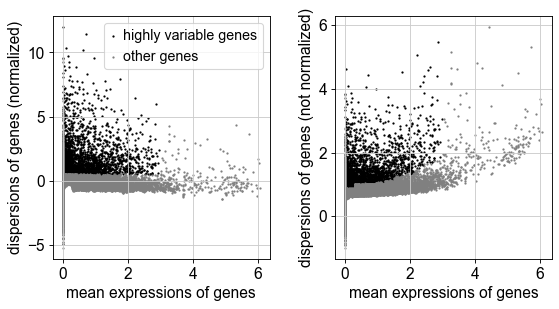

In [11]:
sc.pl.highly_variable_genes(adata_concat)

Set the [.raw] attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object.
You can get back an [AnnData] of the object in [.raw] by calling [.raw.to_adata()].

In [12]:
adata_concat

AnnData object with n_obs × n_vars = 10653 × 32285
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-075', 'mean_counts-075', 'pct_dropout_by_counts-075', 'total_counts-075', 'n_cells_by_counts-12', 'mean_counts-12', 'pct_dropout_by_counts-12', 'total_counts-12', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells_by_counts-FGFRi', 'mean_counts-FGFRi', 'pct_dropout_by_counts-FGFRi', 'total_counts-FGFRi', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [13]:
adata_concat.raw = adata_concat

#### Filter for the highly variable genes

In [14]:
adata_concat = adata_concat[:, adata_concat.var.highly_variable]

In [15]:
adata_concat

View of AnnData object with n_obs × n_vars = 10653 × 2629
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-075', 'mean_counts-075', 'pct_dropout_by_counts-075', 'total_counts-075', 'n_cells_by_counts-12', 'mean_counts-12', 'pct_dropout_by_counts-12', 'total_counts-12', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells_by_counts-FGFRi', 'mean_counts-FGFRi', 'pct_dropout_by_counts-FGFRi', 'total_counts-FGFRi', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

#### Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.

In [16]:
sc.pp.regress_out(adata_concat, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:26)


#### Scale each gene to unit variance. Clip values exceeding standard deviation 10.

In [17]:
sc.pp.scale(adata_concat, max_value=10)

In [18]:
adata_concat

AnnData object with n_obs × n_vars = 10653 × 2629
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-075', 'mean_counts-075', 'pct_dropout_by_counts-075', 'total_counts-075', 'n_cells_by_counts-12', 'mean_counts-12', 'pct_dropout_by_counts-12', 'total_counts-12', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells_by_counts-FGFRi', 'mean_counts-FGFRi', 'pct_dropout_by_counts-FGFRi', 'total_counts-FGFRi', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

## Principal component analysis (PCA)   
Reduce the dimensionality of the data, revealing the main axes of variation and denoises the data.

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


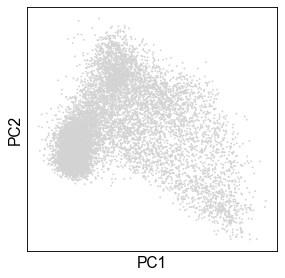

In [19]:
sc.tl.pca(adata_concat, svd_solver='arpack')
sc.pl.pca(adata_concat)

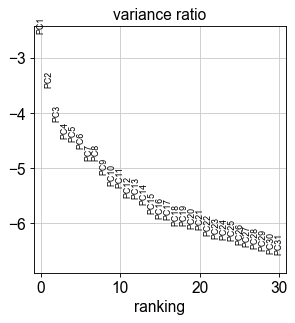

In [21]:
sc.pl.pca_variance_ratio(adata_concat, log=True, save='pca.pdf')

## Computing the neighborhood graph using the PCA representation of the data matrix
n_neighbors: The size of local neighborhood (in terms of number of neighboring data points) used for manifold approximation. Larger values result in more global views of the manifold, while smaller values result in more local data being preserved.    
n_pcs: Use this many PCs

In [22]:
adata_all = sc.read('./210310_all_dataset.h5ad')

In [23]:
sc.pp.neighbors(adata_all, n_neighbors=10, n_pcs=40)
sc.pp.neighbors(adata_concat, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


## Embedding the neighborhood graph in two dimensions using UMAP

UMAP (McInnes et al., 2018). It is potentially more faithful to the global connectivity of the manifold than tSNE, i.e., it better preserves trajectories

In [24]:
sc.tl.umap(adata_concat) 

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


In [25]:
sc.tl.umap(adata_all)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


Multiple values can be given to color. A **gene name** can be used to get an idea on where that marker gene is being expressed. Or even any .obs registered in the adata, as **total_counts** (the number of UMI counts per cell). .var and .uns cannot be used. Depending on the dataset, you can retrieve the **bulk_labels**, a categorical value containing the original labelling of the cells from 10X.  

The number of plots per row is controlled using the **ncols** parameter. **vmax='p99'** uses as max value plotted the 99 percentile (similarly vmin can be used for the minimum value). The max value can be a number or a list of numbers if the vmax wants to be set for multiple plots individually. Also, we can use frameon=False to remove the boxes around the plots and size=50 to set the dot size.

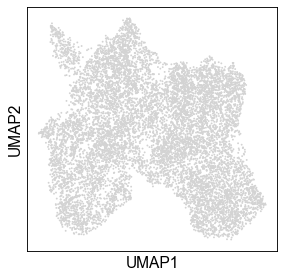

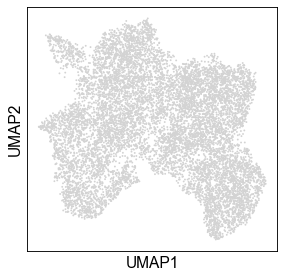

In [26]:
sc.pl.umap(adata_concat, save ='umap.pdf')
sc.pl.umap(adata_all)

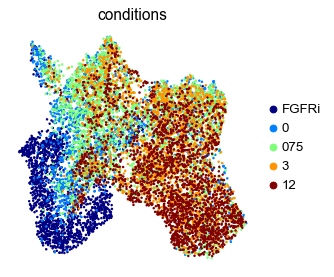

In [33]:
sc.pl.umap(adata_concat, color=[ 'batch'], add_outline=False, legend_loc='right margin', legend_fontsize=12, legend_fontoutline=2,frameon=False,
           title=[ 'conditions'], palette='jet', size=20)

## Clustering the neighborhood graph with the Leiden graph-clustering method

The Leiden graph-clustering method is a community detection based on optimizing modularity by Traag *et al.* (2018). Note that Leiden clustering directly clusters the neighborhood graph of cells, which we already computed in the previous section.    
resolution = A parameter value controlling the coarseness of the clustering. Higher values lead to more clusters. I set it to 0.33      
key_added= `adata.obs` key under which to add the cluster labels.

running Leiden clustering
    finished: found 8 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


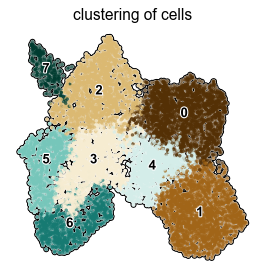

In [34]:
sc.tl.leiden(adata_concat, key_added='clusters', resolution=0.33)
sc.pl.umap(adata_concat, color=['clusters'], add_outline=True, legend_loc='on data', legend_fontsize=12, legend_fontoutline=2,frameon=False,
           title=['clustering of cells'], palette='BrBG', size=40)

# Finding marker genes

Let us compute a ranking for the highly differential genes in each cluster. For this, by default, the .raw attribute of AnnData is used in case it has been initialized before. The simplest and fastest method to do so is the t-test.

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:29)


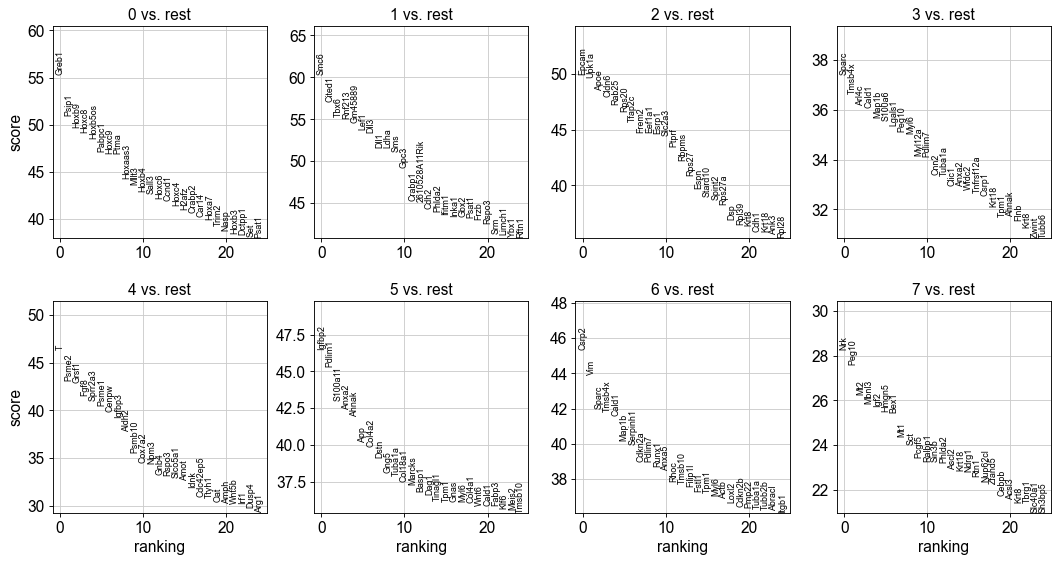

,0,1,2,3,4,5,6,7
0,Greb1,Smc6,Epcam,Sparc,T,Igfbp2,Csrp2,Nrk
1,Psip1,Cited1,Upk1a,Tmsb4x,Psme2,Pdlim1,Vim,Peg10
2,Hoxb9,Tbx6,Apoe,Arl4c,Grsf1,S100a11,Sparc,Mt2
3,Hoxc8,Rnf213,Cldn6,Cald1,Fgf8,Anxa2,Tmsb4x,Mbnl3
4,Hoxb5os,Gm45889,Rab25,Map1b,Sprr2a3,Ahnak,Cald1,Igf2
5,Pabpc1,Lef1,Rps20,S100a6,Psme1,App,Map1b,Hmgn5
6,Hoxc9,Dll3,Tfap2c,Lgals1,Cenpw,Col4a2,Serpinh1,Bex1
7,Ptma,Dll1,Frem2,Peg10,Igfbp3,Dstn,Cdkn2a,Mt1
8,Hoxaas3,Ldha,Eef1a1,Myl6,Aldh2,Gng5,Pdlim7,Sct
9,Mllt3,Sms,Esrp1,Myl12a,Psmb10,Tuba1a,Runx1,Pcgf5


In [35]:
sc.tl.rank_genes_groups(adata_concat, 'clusters', method='wilcoxon')
sc.pl.rank_genes_groups(adata_concat, n_genes=25, sharey=False)

pd.DataFrame(adata_concat.uns['rank_genes_groups']['names']).head(10)

In [94]:
result_file_concat = '220310_concat_dataset.h5ad'

In [95]:
adata_concat.write(result_file_concat)

compare between 2 clusters

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


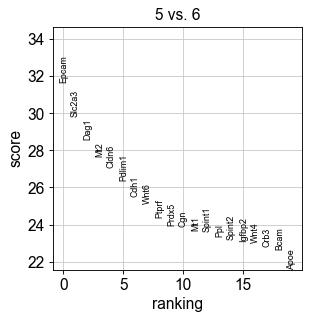

In [37]:
sc.tl.rank_genes_groups(adata_concat, 'clusters', groups=['5'], reference='6', method='wilcoxon')
sc.pl.rank_genes_groups(adata_concat, groups=['5'], n_genes=20)

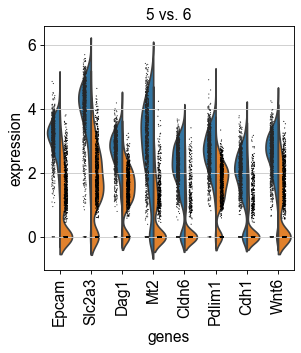

In [38]:
sc.pl.rank_genes_groups_violin(adata_concat, groups='5', n_genes=8)